# import the libraies

In [2]:
import ee
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Authentication and Initialization
  -Before you can make requests to Earth Engine through a client library, you must authenticate

In [4]:
ee.Authenticate()

True

In [5]:
ee.Initialize()

# Getting statistics of the points

In [7]:
#dowenload the image collection and filter it with date and get the median image 
dataset = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterDate('2022-09-01', '2022-09-30').median() 

In [8]:
 # Define the points (coordinates) want to make analysis on it
points = [
    [30.488472, 31.173472],
    [30.524722, 31.151861],
    [30.566028, 31.130972],
    [30.647556, 31.077806],
    [30.734028, 31.028500],
    [30.807556, 31.013361],
    [30.790639, 30.965194],
    [30.801278, 30.913278],
    [30.815306, 30.904389],
    [30.848333, 30.901222],
    [30.876917, 30.873500],
    [30.899056, 30.856250],
    [30.930333, 30.835639],
    [30.961583, 30.783083],
    [31.003111, 30.759333],
    [31.043556, 30.735694],
    [31.085667, 30.727861],
    [31.101222, 30.683639],
    [31.143611, 30.645361],
    [31.182500, 30.600361],
    [31.207500,30.569444],
    [31.224444,30.531583],
    [31.264361,30.518389],
    [31.311250,30.515528],
    [31.344417,30.482861],
    [30.851444,31.030083],
    [30.894389,31.024361],
    [30.893667,31.024667],
    [30.931611,30.990083],
    [30.980056,30.970417],
    [31.031639,30.961556],
    [31.085750,30.965417],
    [31.142111,30.968861],
    [31.214722,30.984111],
    [31.268806,30.990528],
    [31.261778,31.049611],
    [31.278194,31.093417],
    [31.328944,31.132139],
    [31.399000,31.125000],
    [31.471750,31.126861],
    [31.526444,31.140306],
    [31.565361,31.081889],
    [31.586472,31.052500],
    [31.412167,30.451000],
    [31.340417,30.366278],
    [31.205000,30.091444],
    [31.167278,30.069167],
    [31.128167,30.102194],
    [31.120861,30.164528],
    [31.108250,30.211944],
    [31.086417,30.294417],
    [31.069194,30.359806],
    [31.013250,30.473583],
]

In [9]:
# Create a feature collection from the points
features = ee.FeatureCollection([ee.Feature(ee.Geometry.Point(coord)) for coord in points])

# Function to get statistics for each point
def get_statistics(feature):
    point = feature.geometry()
    # Calculate the median for each band in the median image
    stats = dataset.reduceRegion(
        reducer=ee.Reducer.median(),
        geometry=point,
        scale=30  # resolution in meters
    )
    return feature.set(stats)

In [10]:
# Apply the function to each feature in the features collection
stats_features = features.map(get_statistics)

# Prepare to create the statistics data table to store the result

In [12]:
# Prepare to create the statistics data table
data_table = {
    'longitude': [],
    'latitude': [],
    'B1': [],
    'B2': [],
    'B3': [],
    'B4': [],
    'B5': [],
    'B6': [],
    'B7': [],
    'B8': [],
    'B8A': [],
    'B9': [],
    'B11':[],
    'B12':[]
}

In [13]:
# Evaluate the feature collection
stats_features.getInfo().get('features', [])
for f in stats_features.getInfo().get('features', []):
    coords = f['geometry']['coordinates']
    properties = f['properties']
    
    data_table['longitude'].append(coords[0])
    data_table['latitude'].append(coords[1])
    data_table['B1'].append(properties.get('B1'))
    data_table['B2'].append(properties.get('B2'))
    data_table['B3'].append(properties.get('B3'))
    data_table['B4'].append(properties.get('B4'))
    data_table['B5'].append(properties.get('B5'))
    data_table['B6'].append(properties.get('B6'))
    data_table['B7'].append(properties.get('B7'))
    data_table['B8'].append(properties.get('B8'))
    data_table['B8A'].append(properties.get('B8A'))
    data_table['B9'].append(properties.get('B9'))
    data_table['B11'].append(properties.get('B11'))
    data_table['B12'].append(properties.get('B12'))

In [14]:
# Create a DataFrame to display statistics
df = pd.DataFrame(data_table)
# save result to csv file
csv_filename = 'senstil2_statistics_results.csv'
df.to_csv(csv_filename, index=False)
print(f'Results saved to {csv_filename}')

Results saved to senstil2_statistics_results.csv


# calculate the correlation

In [16]:
data=pd.read_csv('senstil2_statistics_results.csv')
data.head()

,longitude,latitude,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,30.488472,31.173472,427.0,398.0,590.5,625.0,923.5,1276.0,1458.0,1488.0,1560.5,2669.5,1535.0,1056.0
1,30.524722,31.151861,446.0,232.0,481.5,332.0,754.5,2374.0,3269.0,3324.0,3379.5,3492.0,1453.0,812.0
2,30.566028,31.130972,500.0,799.5,1028.5,1263.0,1621.5,2150.5,2456.5,2450.5,2594.0,2701.0,2158.5,1608.0
3,30.647556,31.077806,691.5,743.5,930.5,1208.5,1574.0,1965.0,2210.0,2223.5,2449.0,2773.0,2586.0,1961.5
4,30.734028,31.028500,371.0,392.0,742.0,425.0,1310.0,3166.0,3862.0,3964.0,4079.0,3784.0,1539.0,785.0


In [17]:
# add the HM concentration column to df
data['HM']=[
384.9,
318.3,
342.4,
440.8,
397.6,
380.4,
381.2,
414.5,
333.9,
362.8,
366.9,
407.6,
373.5,
382.0,
385.6,
356.8,
293.4,
332.1,
363.2,
429.9,
378.6,
419.2,
399.6,
189.0,
427.1,
429.2,
392.4,
387.6,
437.0,
444.5,
410.6,
453.4,
409.2,
448.0,
376.7,
395.0,
397.7,
347.8,
328.7,
292.1,
222.7,
152.0,
141.5,
287.4,
340.4,
318.1,
309.6,
325.8,
246.8,
231.3,
326.1,
276.7,
340.9]

In [18]:
#split the target(HM) and get correlation between it and features(bands)
target='HM'
#pearson correlation
corr=data.corr()[target]
print(corr)

longitude   -0.457153
latitude     0.234361
B1          -0.117911
B2          -0.018905
B3          -0.002197
B4          -0.003151
B5           0.036552
B6          -0.008208
B7           0.005835
B8          -0.024396
B8A          0.007143
B9           0.042805
B11         -0.096553
B12         -0.053124
HM           1.000000
Name: HM, dtype: float64


In [19]:
# get spearman correlation
corr=data.corr(method='spearman')[target]
print(corr)

longitude   -0.338978
latitude     0.209160
B1          -0.271580
B2          -0.086648
B3           0.002016
B4          -0.054871
B5           0.054387
B6           0.017900
B7           0.052694
B8           0.016933
B8A          0.044428
B9           0.122238
B11         -0.120142
B12         -0.120787
HM           1.000000
Name: HM, dtype: float64


In [20]:
#kendall corr
corr2=data.corr(method='kendall')[target]
print(corr2)

longitude   -0.238026
latitude     0.166909
B1          -0.174292
B2          -0.063954
B3           0.002178
B4          -0.045735
B5           0.048639
B6           0.020319
B7           0.038476
B8           0.007257
B8A          0.027576
B9           0.088534
B11         -0.081277
B12         -0.079826
HM           1.000000
Name: HM, dtype: float64


In [21]:
# numpy correlation
x=data.drop(columns='HM')
y=data['HM']
# Calculate the correlation only if they have the same number of rows
if x.shape[0] == y.shape[0]:
    correlation_matrix = np.corrcoef(x.T, y)  # Transpose x to have features as rows
    print("Correlation matrix:\n", correlation_matrix)
else:
    print("Shape mismatch: Cannot calculate correlation.")

Correlation matrix:
 [[ 1.         -0.23913746  0.0480244   0.03023123  0.14566188  0.0782711
   0.22283362  0.33218952  0.25588844  0.28216825  0.27159141  0.10410267
   0.25409233  0.12985617 -0.4571532 ]
 [-0.23913746  1.         -0.30809442 -0.38621119 -0.37114262 -0.32343369
  -0.20091013  0.11784954  0.22915306  0.24329356  0.26538384  0.39916321
  -0.33185906 -0.38818301  0.2343615 ]
 [ 0.0480244  -0.30809442  1.          0.86027015  0.775954    0.79810769
   0.65377593 -0.23967427 -0.38695731 -0.35628215 -0.40353938 -0.434243
   0.7157526   0.82653785 -0.11791072]
 [ 0.03023123 -0.38621119  0.86027015  1.          0.94984566  0.95664519
   0.83525583 -0.20182826 -0.37340281 -0.35454647 -0.38902182 -0.38484479
   0.80905685  0.91639715 -0.0189046 ]
 [ 0.14566188 -0.37114262  0.775954    0.94984566  1.          0.93092016
   0.93290743  0.03941686 -0.1444971  -0.12108426 -0.15866598 -0.18984497
   0.81524202  0.87312707 -0.00219663]
 [ 0.0782711  -0.32343369  0.79810769  0.956645

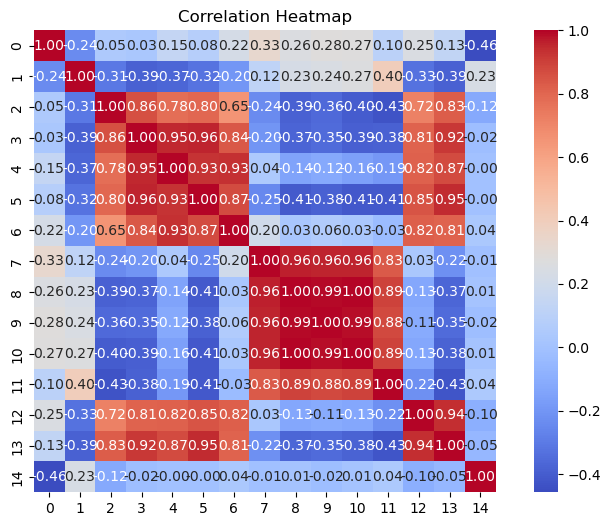

In [22]:
# Visualize the correlation using a heatmap to numpy correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()